## DC Bike Rental Project:
- Dataset:
        * [UCI capital bike sharing dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
        * Number of rentals every hour for two years (2011 - 2013)  
        * 17379 rows and 15 features
        
-------------------------------------------------------------------------

- Business Goals:
   * identify key features for increase total bike rentals 
   * identify features for cases where casual users are more than registered users 
      * casual users: passes (day, week, month, 1 time payment)
      * registered users: repeat payments (day key, monthly, yearly) 
   * look for time trends and seasonality 
     * test out a forecast model




In [1]:
# import libraries
import helper_functions1 as hf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load cleaned dataset for exploratory visualization 
bikes_df = pd.read_pickle('cleaned_data/bikes_regression.pkl')

### column transformation and feature selections:  

* for details, see datacleaning notebook file 

- drop instant columns as just index id  
- convert dteday as datetime object and set as index for time series analysis
- convert season, yr, mnth, holiday, weekday, workingday, weathersit to categorical value
   * create one hot encoder (pd.dummy)
- create a new column as more casual than register (compare value between 2 for logistic regression)
   * remove casual and registered users 
- remove atemp as it correlates with temp column 
- remove month columns as it correlates with season column but not as correlated with target
- perform np.log transformation for cnt and temp for normal distribution
- perform cubic root transformation for hum column for normal distribution 

------------

### Linear Regression:
   * target: cnt 
### Logistic Regression:
   * target: 1 for when more casual users than registered users, otherwise 0 

### visual exploratory data analysis

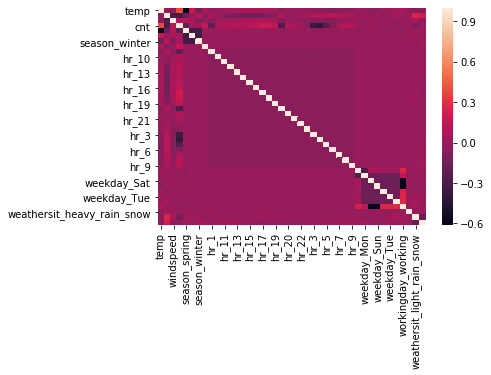

In [3]:
# correlation map 
sns.heatmap(bikes_df.corr())

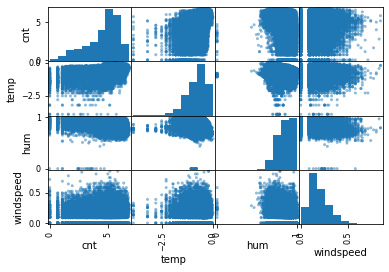

In [4]:
pd.plotting.scatter_matrix(bikes_df[['cnt','temp','hum','windspeed']])
plt.show()

### visualization insights:

* correlation heatmap: hr_1 to hr23 appear to have the most correlation with cnt 
* none of numeric variable appear to linearly correlate with cnt 

------

### Linear Regression

In [5]:
bikes_df.loc[:,]

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2012', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'holiday_not_holiday', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'workingday_working', 'weathersit_heavy_rain_snow',
       'weathersit_light_rain_snow', 'weathersit_mist'],
      dtype='object')